**Jarrian Vince G. Gojar**\
Instructor I\
*College of Information and Communications Technology, Sorsogon State University, Philippines*

# Introduction

`Edge detection` is a fundamental tool in image processing, machine
vision, and computer vision, particularly in the areas of feature
detection and feature extraction. Edge detection is a process that
identifies the boundaries of objects within images. It works by
detecting discontinuities in brightness. Edge detection is used for
image segmentation and data extraction in areas such as image
processing, computer vision, and machine vision.

`Edges` in grayscale images are generally defined as large or abrupt
changes in intensity along a line or curve. `Hard edges` are abrupt
changes in intensity, while `soft edges` are gradual changes in
intensity.

There are many algorithms for edge detection, but the most common
ones are:

- Sobel Operator
- Difference of Gaussian (DoG)
- Harris Corner Detection
<!-- - Canny Edge Detector -->
<!-- - Prewitt Operator -->
<!-- - Roberts Cross -->
<!-- - Scharr Operator -->

**Read More:**

- [Sobel Operator - OpenCV Documentation](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html)
- [Difference of Gaussian - OpenCV Documentation](https://docs.opencv.org/3.4/d5/d0f/tutorial_py_gradients.html)
- [Harris Corner Detection - OpenCV Documentation](https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html)
<!-- - [Sobel Operator - Wikipedia](https://en.wikipedia.org/wiki/Sobel_operator) -->
<!-- - [Difference of Gaussian - Wikipedia](https://en.wikipedia.org/wiki/Difference_of_Gaussians) -->
<!-- - [Harris Corner Detection - Wikipedia](https://en.wikipedia.org/wiki/Harris_Corner_Detector) -->

# Setup

In [ ]:
%pip install opencv-python opencv-contrib-python numpy matplotlib

# Initial Setup

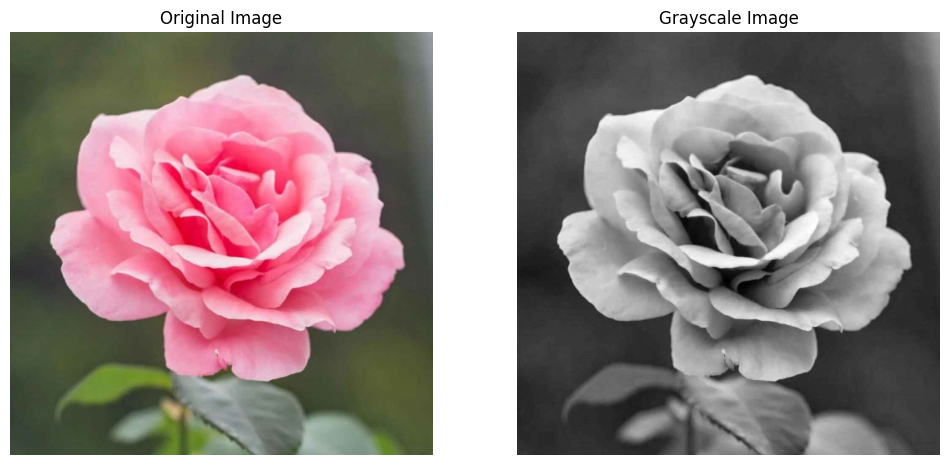

In [14]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Asset Root
asset_root = '../../assets/'

# Image Path
image_path = asset_root + '/images/pink_flower.jpg'

# Read Image and convert to RGB
input_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Convert Image to Grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Display Both Image
plt.figure("Pink Flower", figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.show()

# Sobel Operator

The `Sobel operator` is used in image processing and computer vision,
particularly within edge detection algorithms. Technically, it is a
`finite difference operator`, computing an approximation of the
gradient of the image intensity function. At each point in the image,
the result of the Sobel–Feldman operator is either the corresponding
gradient vector or the norm of this vector. The Sobel operator is
based on convolving the image with a small, separable, and integer
valued filter in the horizontal and vertical directions and is
therefore relatively inexpensive in terms of computations. On the
other hand, the gradient approximation that it produces is relatively
noisy. The `Sobel operator` is shown below.

$$
G_x = \begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1
\end{bmatrix} * A
$$

$$
G_y = \begin{bmatrix}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix} * A
$$

`A` is the grayscale image, and `G_x` and `G_y` are the gradients in the x and y
directions, respectively. The `Sobel operator` is used to detect edges
in images, emphasizing the regions of high spatial frequency. The
operator uses two 3×3 kernels, one estimating the gradient in the x
direction and the other estimating the gradient in the y direction.

After applying the `Sobel operator`, the gradient magnitude is
calculated using the formula above. The gradient magnitude is the
square root of the sum of the squares of the horizontal and vertical
gradients.

$$
G = \sqrt{G_x^2 + G_y^2}
$$

Using the `Sobel operator`, we can also calculate the gradient
direction using the formula below.

$$
\Theta = \arctan2\left(\frac{G_y}{G_x}\right)
$$

`arctan2` is a function that returns the angle whose tangent is the
quotient of two specified numbers. The gradient direction is the angle
of the gradient vector with respect to the x-axis. The gradient
direction is used to determine the orientation of the edge in the
image.

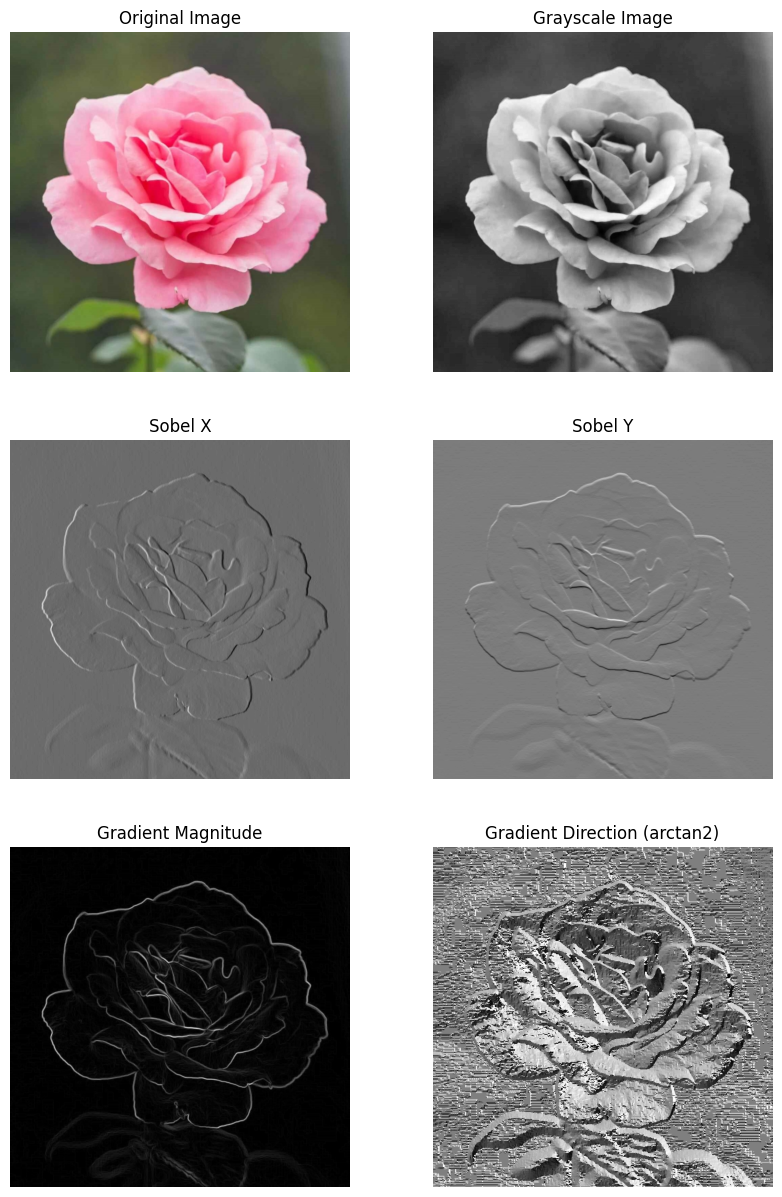

In [10]:
# Implement Sobel Operator
def SobelX(image):
    return cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

def SobelY(image):
    return cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

sobel_x = SobelX(gray_image)
sobel_y = SobelY(gray_image)

# Calculate Gradient Magnitude
def GradientMagnitude(sobel_x, sobel_y):
    return np.sqrt(sobel_x ** 2 + sobel_y ** 2)

gradient_magnitude = GradientMagnitude(sobel_x, sobel_y)

# Calculate Gradient Direction
def GradientDirection(sobel_x, sobel_y):
    return np.arctan2(sobel_y, sobel_x)

gradient_direction = GradientDirection(sobel_x, sobel_y)

# Display Sobel Operator
plt.figure("Sobel Operator", figsize=(10, 15))

plt.subplot(3, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(gradient_direction, cmap='gray')
plt.title("Gradient Direction (arctan2)")
plt.axis('off')

plt.show()

**Read More:**

- [Sobel Operator - OpenCV](https://docs.opencv.org/4.x/d2/d2c/tutorial_sobel_derivatives.html)
- [Arctan2 - Numpy](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html)
- [Arctan - Wikipedia](https://en.wikipedia.org/wiki/Atan2)

# Difference of Gaussian (DoG)

The `Difference of Gaussian` is a technique used to find the edges in an
image. It is a method of image processing that involves the subtraction
of one blurred version (Gaussian) of an image from another, less blurred
version of the image.

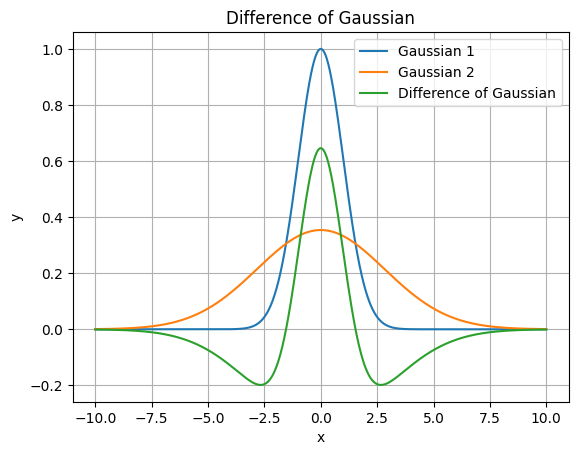

In [3]:
# Create a Gaussian Kernel
x = np.linspace(-10, 10, 1000)

# Gaussian Kernel for Sigma = 1
y1 = np.exp(-x ** 2 / 2)

# Gaussian Kernel for Sigma = 2
y2 = 0.354 * np.exp(-x ** 2 / 16)

# Difference of Gaussian
dog = y1 - y2

# Display Difference of Gaussian
plt.figure("Difference of Gaussian")

plt.plot(x, y1, label='Gaussian 1')
plt.plot(x, y2, label='Gaussian 2')
plt.plot(x, dog, label='Difference of Gaussian')

plt.title("Difference of Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.show()

The code above shows the distribution of the `Difference of Gaussian` (DoG).
The `Difference of Gaussian` is the subtraction of two Gaussian functions
with different standard deviations. The `Difference of Gaussian` is used
to find the edges in an image.

The `Gaussian` operator is the convolution of the image with a Gaussian
function. The `Gaussian` function is denoted by the following formula:
$$
G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

where:

- $x$ and $y$ are the coordinates of the image.
- $\sigma$ is the standard deviation of the Gaussian distribution.

The `Difference of Gaussian` is the subtraction of two Gaussian functions
with different standard deviations. The formula for `Difference of Gaussian`
is given by:

$$
DoG(x, y) = G(x, y, \sigma_1) - G(x, y, \sigma_2)
$$

where:

- $G(x, y, \sigma_1)$ is the Gaussian function with standard deviation
    $\sigma_1$.
- $G(x, y, \sigma_2)$ is the Gaussian function with standard deviation
    $\sigma_2$.
- $\sigma_1$ and $\sigma_2$ are the standard deviations of the Gaussian
    functions.

<Figure size 640x480 with 0 Axes>

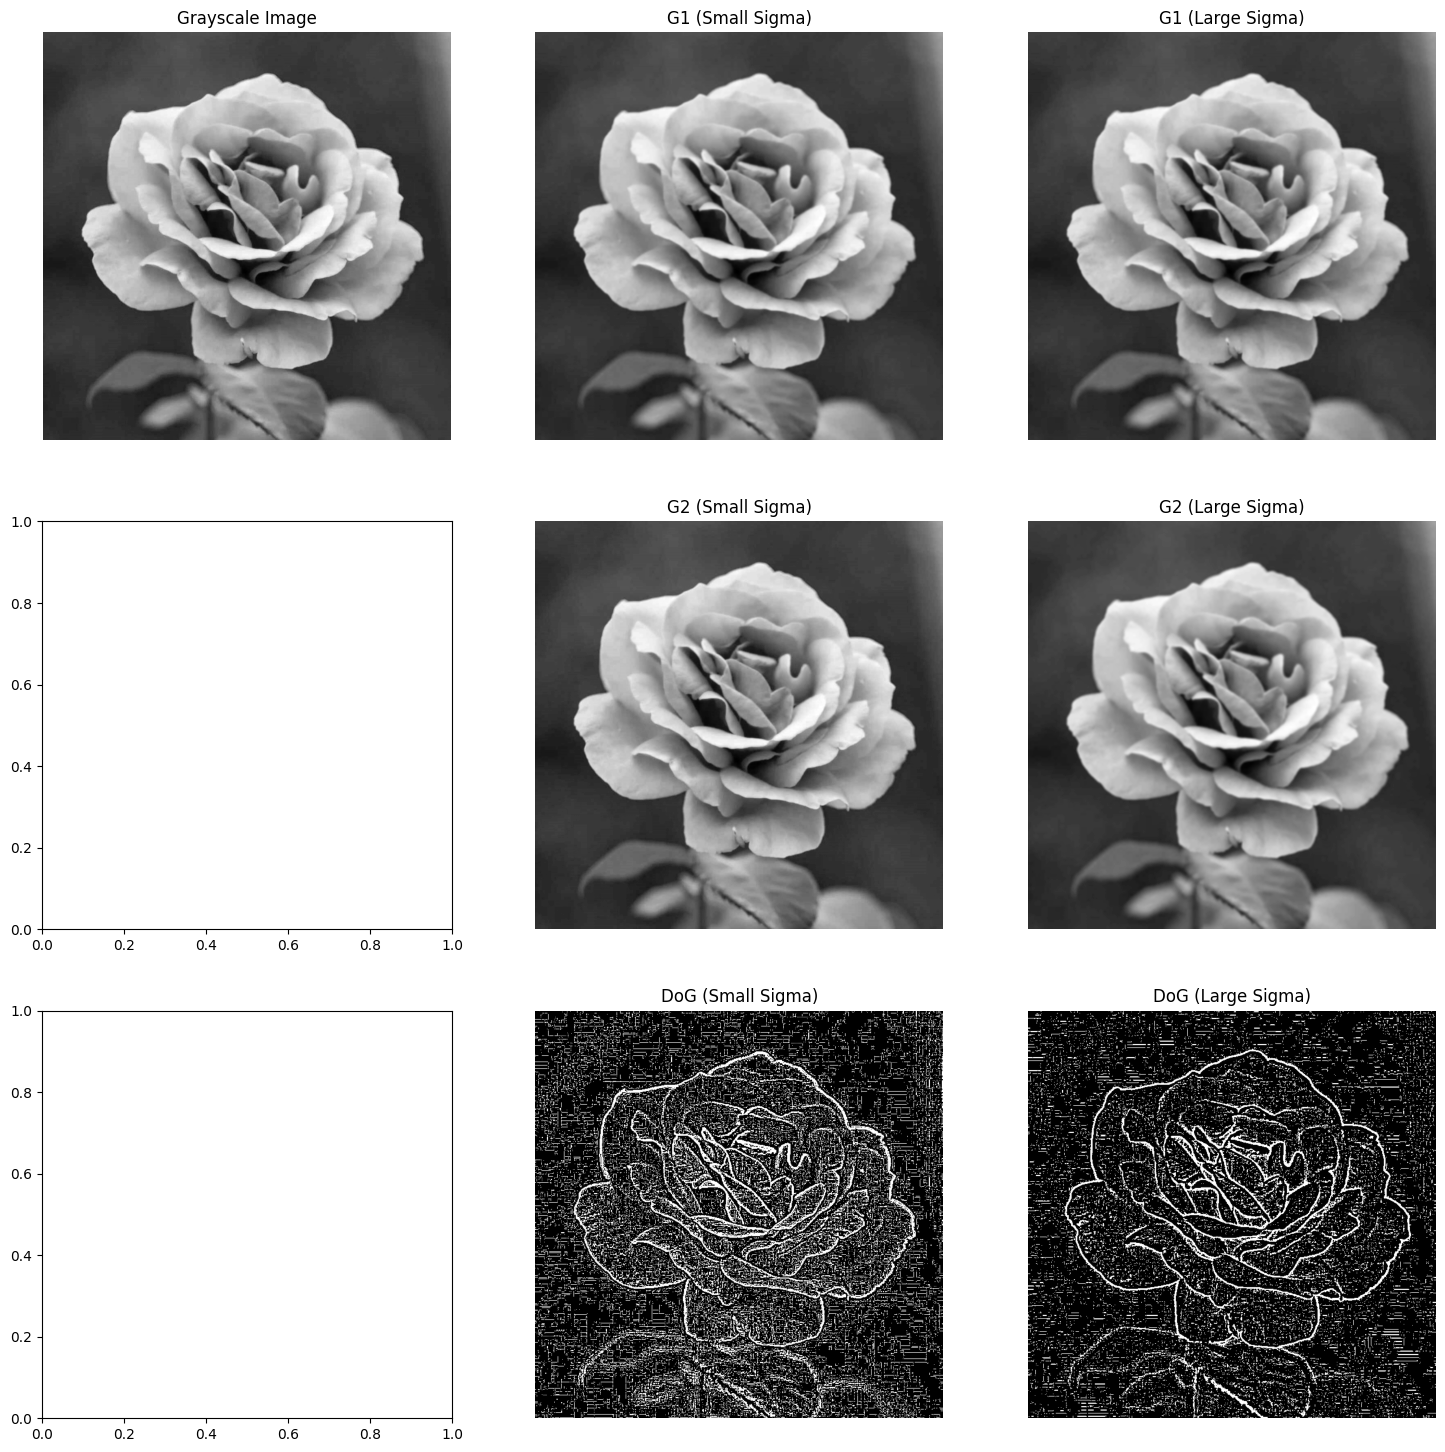

In [4]:
# Implement Difference of Gaussian Filter
def DoGFilter(image, sigma1, sigma2):
    gaussian1 = cv2.GaussianBlur(image, (5, 5), sigma1)
    gaussian2 = cv2.GaussianBlur(image, (5, 5), sigma2)
    return gaussian1 - gaussian2, gaussian1, gaussian2

# Apply Difference of Gaussian Filter with small and large sigma
dog_filter_small_sigma, dog_sm_g1, dog_sm_g2 = DoGFilter(gray_image, 1, 0.5)
dog_filter_large_sigma, dog_lg_g1, dog_lg_g2 = DoGFilter(gray_image, 1, 2)

# Display Difference of Gaussian
plt.figure("Difference of Gaussian")

plt.subplots(3, 3, figsize=(18, 18))

plt.subplot(3, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(dog_sm_g1, cmap='gray')
plt.title("G1 (Small Sigma)")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(dog_lg_g1, cmap='gray')
plt.title("G1 (Large Sigma)")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(dog_sm_g2, cmap='gray')
plt.title("G2 (Small Sigma)")
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(dog_lg_g2, cmap='gray')
plt.title("G2 (Large Sigma)")
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(dog_filter_small_sigma, cmap='gray')
plt.title("DoG (Small Sigma)")
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(dog_filter_large_sigma, cmap='gray')
plt.title("DoG (Large Sigma)")
plt.axis('off')

plt.show()

**Read More:**

- [Difference of Gaussian - Wikipedia](https://en.wikipedia.org/wiki/Difference_of_Gaussians)
- [Sobel Operator - Wikipedia](https://en.wikipedia.org/wiki/Sobel_operator)
- [Gaussian Kernel - Wikipedia](https://en.wikipedia.org/wiki/Gaussian_function)
- [Sobel Operator - OpenCV](https://docs.opencv.org/4.x/d2/d2c/tutorial_sobel_derivatives.html)
- [Gaussian Kernel - OpenCV](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)
- [Difference of Gaussian - OpenCV](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d6009e0513f5db4e6b0)

# Corner Detection using Harris Corner Detector

`Corner Detection` is a technique used to detect corners in an image.
Corners are points where the intensity of the image changes in two
directions. The `Harris Corner Detector` is a popular corner detection
algorithm that uses the `Sobel Operator` to calculate the gradient of
the image and then computes the `Harris Response` to detect corners.

The first step in the Harris Corner Detector is to calculate the
`Structure Tensor` of the image. The `Structure Tensor` is a matrix
that represents the local structure of the image. It is calculated
using the `Sobel Operator` to compute the gradient of the image in
the x and y directions.

The `Structure Tensor` is defined as:

$$
M = \sum_{x, y} w(x, y) \begin{bmatrix} I_x^2 & I_x I_y \\ I_x I_y & I_y^2 \end{bmatrix}
$$

where:

- $M$ is the `Structure Tensor`
- $w(x, y)$ is a `Gaussian Window` function
- $I_x$ and $I_y$ are the gradients of the image in the x and y directions
- $I_x^2$ and $I_y^2$ are the squared gradients of the image in the x and y directions
- $I_x I_y$ is the product of the gradients of the image in the x and y directions

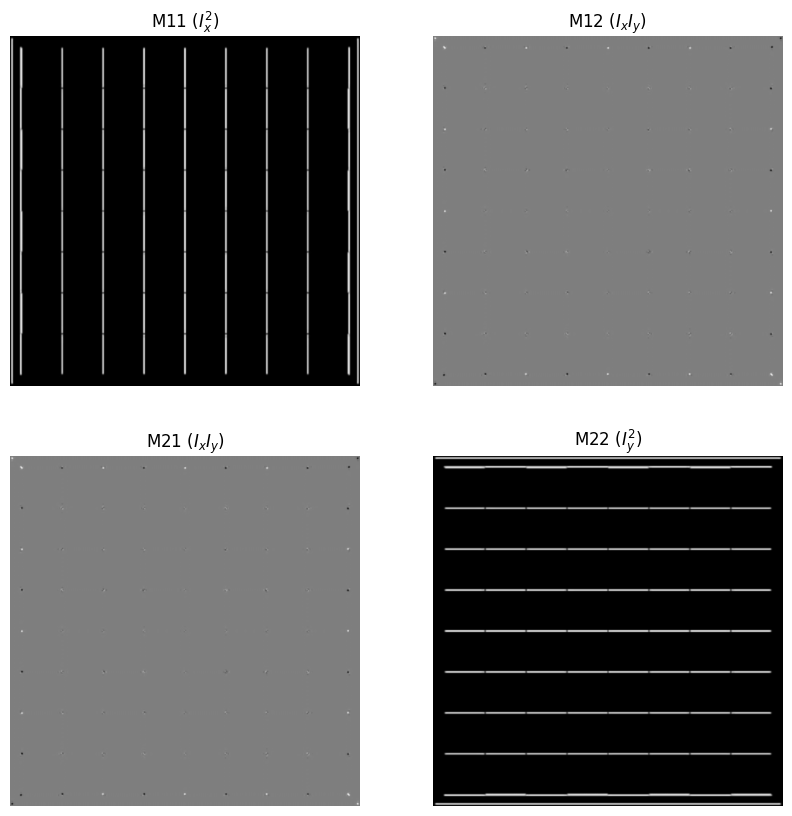

In [11]:
# Read Input Image
input_image2 = cv2.imread(asset_root + '/images/chessboard.jpg')
input_image2 = cv2.cvtColor(input_image2, cv2.COLOR_BGR2RGB)
gray_image2 = cv2.cvtColor(input_image2, cv2.COLOR_RGB2GRAY)

# Create the Structure Tensor
def StructureTensor(image, sigma):
    # Compute the gradients of the image
    sobel_x = SobelX(image)
    sobel_y = SobelY(image)

    # Compute the elements of the Structure Tensor
    I_x2 = sobel_x ** 2
    I_y2 = sobel_y ** 2
    I_xy = sobel_x * sobel_y

    # Create a Gaussian window
    window = cv2.getGaussianKernel(5, sigma)
    window = window.dot(window.T)

    # Compute the elements of the Structure Tensor using the Gaussian window
    M = np.zeros((2, 2, image.shape[0], image.shape[1]))
    M[0, 0] = cv2.filter2D(I_x2, -1, window)
    M[0, 1] = cv2.filter2D(I_xy, -1, window)
    M[1, 0] = cv2.filter2D(I_xy, -1, window)
    M[1, 1] = cv2.filter2D(I_y2, -1, window)

    return M

# Compute the Structure Tensor
structure_tensor = StructureTensor(gray_image2, 1)

# Display the Structure Tensor
plt.figure("Structure Tensor", figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(structure_tensor[0, 0], cmap='gray')
plt.title("M11 ($I_x^2$)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(structure_tensor[0, 1], cmap='gray')
plt.title("M12 ($I_x I_y$)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(structure_tensor[1, 0], cmap='gray')
plt.title("M21 ($I_x I_y$)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(structure_tensor[1, 1], cmap='gray')
plt.title("M22 ($I_y^2$)")
plt.axis('off')

plt.show()

The code above computes the `Structure Tensor` of the image using the
`Sobel Operator` and a `Gaussian Window`. The `Structure Tensor` is a
2x2 matrix that represents the local structure of the image. It contains
the elements $M_{11}$, $M_{12}$, $M_{21}$, and $M_{22}$, which are
computed using the gradients of the image in the x and y directions.

The `M_{11}` and `M_{22}` elements of the `Structure Tensor` represent
the squared gradients of the image in the x and y directions, while the
`M_{12}` and `M_{21}` elements represent the product of the gradients
of the image in the x and y directions.

The next step in the Harris Corner Detector is to compute the
`Harris Response` using the `Structure Tensor`. The `Harris Response`
is a measure of the `cornerness` of a pixel and is calculated using
the `Eigenvalues` of the `Structure Tensor`. `Eigenvalues` are values
that represent the amount of `stretching` or `compression` in a
particular direction. The `Harris Response` is defined as:

$$
R = \det(M) - k \cdot \text{trace}(M)^2
$$

where:

- $R$ is the `Harris Response`
- $\det(M)$ is the `Determinant` of the `Structure Tensor`
- $\text{trace}(M)$ is the `Trace` of the `Structure Tensor`
- $k$ is a constant that determines the sensitivity of the corner detector, where $k \in [0.04, 0.06]$

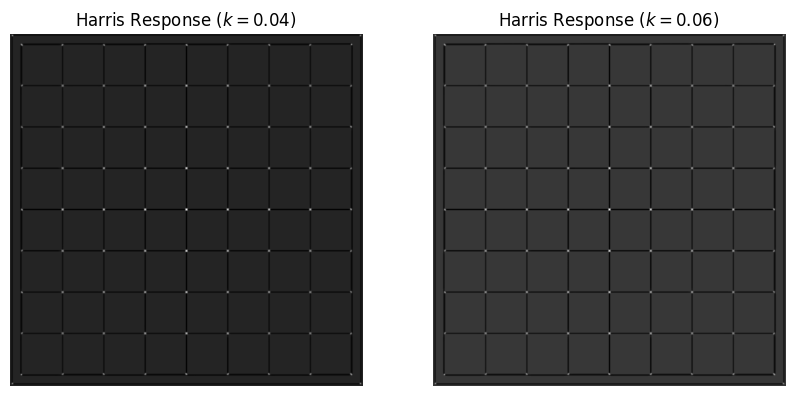

In [12]:
# Compute the Harris Response
def HarrisResponse(M, k):
    det_M = M[0, 0] * M[1, 1] - M[0, 1] * M[1, 0]
    trace_M =  M[0, 0] + M[1, 1]
    return det_M - k * trace_M ** 2

# Compute the Harris Response
harris_response_min = HarrisResponse(structure_tensor, 0.04)
harris_response_max = HarrisResponse(structure_tensor, 0.06)

# Display the Harris Response
plt.figure("Harris Response", figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(harris_response_min, cmap='gray')
plt.title("Harris Response ($k = 0.04$)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(harris_response_max, cmap='gray')
plt.title("Harris Response ($k = 0.06$)")
plt.axis('off')

plt.show()

The final step in the Harris Corner Detector is to detect the corners
in the image using the `Harris Response`. The `Harris Response` is a
measure of the `cornerness` of a pixel, where higher values indicate
the presence of a corner. To detect corners, we can apply a threshold
to the `Harris Response` and select the pixels with values above the
threshold as corners. We can also apply `Non-Maximum Suppression` to
remove the non-maximum values in the `Harris Response` and select only
the local maxima as corners. This can be done by dilating the `Harris
Response` and comparing it with the original response to select only
the local maxima. A `local maxima` is a pixel that has a higher value
than its neighbors.

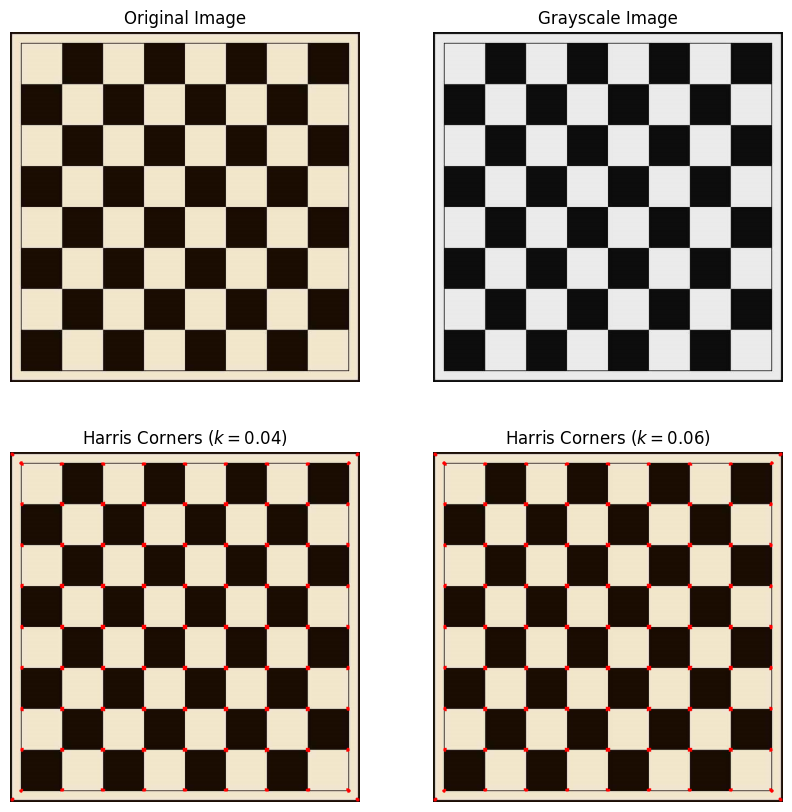

In [13]:
# Apply the Harris Corner Detector
def HarrisCornerDetector(image, gray_image, k, threshold):
    # Compute the Structure Tensor
    structure_tensor = StructureTensor(gray_image, 1)

    # Compute the Harris Response
    harris_response = HarrisResponse(structure_tensor, k)

    # Apply the Harris Corner Detector
    harris_response = cv2.dilate(harris_response, None)
    image[harris_response > threshold * harris_response.max()] = [255, 0, 0]

    return image

# Apply the Harris Corner Detector
harris_corners_min = HarrisCornerDetector(input_image2.copy(), gray_image2, 0.04, 0.01)
harris_corners_max = HarrisCornerDetector(input_image2.copy(), gray_image2, 0.06, 0.01)

# Display the Harris Corners
plt.figure("Harris Corners", figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(input_image2)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_image2, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(harris_corners_min)
plt.title("Harris Corners ($k = 0.04$)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(harris_corners_max)
plt.title("Harris Corners ($k = 0.06$)")
plt.axis('off')

plt.show()

**Read More:**

- [Harris Corner Detector - OpenCV](https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html)
- [Harris Corner Detector - Wikipedia](https://en.wikipedia.org/wiki/Harris_Corner_Detector)
- [Sobel Operator - Wikipedia](https://en.wikipedia.org/wiki/Sobel_operator)
- [Sobel Operator - OpenCV](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html)
- [Difference of Gaussian - Wikipedia](https://en.wikipedia.org/wiki/Difference_of_Gaussians)
- [Difference of Gaussian - OpenCV](https://docs.opencv.org/3.4/d5/d0f/tutorial_py_gradients.html)
- [Structure Tensor - Wikipedia](https://en.wikipedia.org/wiki/Structure_tensor)
- [Structure Tensor - OpenCV](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4f3030d75c9d2d3209d6513c6f5e5c1e)

# Summary

- The `Sobel Operator` is used to compute the gradient of an image in the x and y directions.
- The `Gradient Magnitude` is computed by combining the x and y gradients using the Pythagorean theorem.
- The `Gradient Direction` is computed using the arctangent function (arctan2).
- The `Difference of Gaussian (DoG)` filter is used to detect edges in an image by subtracting two Gaussian-blurred images.
- The `Structure Tensor` is used to compute the second-moment matrix of the image gradients.
- The `Harris Corner Detector` is used to detect corners in an image by analyzing the eigenvalues of the Structure Tensor.
- The `Harris Response` is computed using the determinant and trace of the Structure Tensor.
- The `Harris Corners` are detected by applying a threshold to the Harris Response and marking the corners on the image.
- The `Harris Corner Detector` can be used to detect corners in an image and is commonly used in computer vision applications.

# References

- Thomas G. (2022). Graphic Designing: A Step-by-Step Guide (Advanced). Larsen & Keller. ISBN: 978-1-64172-536-1
- Singh M. (2022). Computer Graphics and Multimedia. Random Publications LLP. ISBN: 978-93-93884-95-4
- Singh M. (2022). Computer Graphics Science. Random Publications LLP. ISBN: 978-93-93884-03-9
- Singh M. (2022). Computer Graphics Software. Random Publications LLP. ISBN: 9789393884114
- Tyagi, V. (2021). Understanding Digital Image Processing. CRC Press.
- Ikeuchi, K. (Ed.). (2021). Computer Vision: A Reference Guide (2nd ed.). Springer.
- Bhuyan, M. K. (2020). Computer Vision and Image Processing. CRC Press.
- Howse, J., & Minichino, J. (2020). Learning OpenCV 4 Computer Vision with Python 3: Get to grips with tools, techniques, and algorithms for computer vision and machine learning. Packt Publishing Ltd.
- Kinser, J. M. (2019). Image Operators: Image Processing in Python. CRC Press.
